In [11]:
from google.colab import drive
# 挂载谷歌云盘
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


可以独立拆分为的专利转让记录：A -P -A

1. 一个assignor - 一个patent - 一个assignee； ✓

2. 一个assignor - 多个patent - 一个assignee； ✓

3. 一个assignor - 一个patent - 多个assignee； ✓

4. 一个assignor - 多个patent - 多个assignee； × （patent和assignee无法确定)

5. 多个assignor - 一个patent - 一个assignee；✓

6. 多个assignor - 多个patent - 一个assignee； ×（assignor和patent无法确定）

7. 多个assignor - 一个patent - 多个assignee； ✓

8. 多个assignor - 多个patent - 多个assignee； ×



我要确保每条提取出来的转让记录都是能够确定：这个assignee从某个assignor中确实获得了某个patent。

所以，我要采用保守的筛选方法，仅拆分出确定满足以上条件的样本。【assignor和patent确定可以对应 & patent和assignee确定可以对应】

所以，我先外部合并五张表，然后提取出符合条件的有效rf_id，然后用这个有效rf_id列表去筛选merged_df

In [ ]:
!unzip "/content/drive/MyDrive/PAD_csv.zip" -d "/content/drive/MyDrive/PAD_csv/"

In [12]:
import pandas as pd

# 打开pad原始文件
assignment_path = '/content/drive/MyDrive/PAD_csv/assignment.csv'
assignor_path = '/content/drive/MyDrive/PAD_csv/assignor.csv'
assignee_path = '/content/drive/MyDrive/PAD_csv/assignee.csv'
documentid_path = '/content/drive/MyDrive/PAD_csv/documentid.csv'
assignment_conveyance_path = '/content/drive/MyDrive/PAD_csv/assignment_conveyance.csv'

assignment_df = pd.read_csv(assignment_path)
assignor_df = pd.read_csv(assignor_path)
assignee_df = pd.read_csv(assignee_path)
documentid_df = pd.read_csv(documentid_path)
assignment_conveyance_df = pd.read_csv(assignment_conveyance_path)

<ipython-input-12-a7de44cdc416>:10: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  assignment_df = pd.read_csv(assignment_path)
<ipython-input-12-a7de44cdc416>:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  assignor_df = pd.read_csv(assignor_path)
<ipython-input-12-a7de44cdc416>:13: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  documentid_df = pd.read_csv(documentid_path)


In [ ]:
# 打印所有列名
print(assignment_df.columns.tolist())

['rf_id', 'file_id', 'cname', 'caddress_1', 'caddress_2', 'caddress_3', 'caddress_4', 'reel_no', 'frame_no', 'convey_text', 'record_dt', 'last_update_dt', 'page_count', 'purge_in']


In [ ]:
# 打印所有列名
print(assignor_df.columns.tolist())

['rf_id', 'or_name', 'exec_dt', 'ack_dt']


In [ ]:
# 打印所有列名
print(assignee_df.columns.tolist())

['rf_id', 'ee_name', 'ee_address_1', 'ee_address_2', 'ee_city', 'ee_state', 'ee_postcode', 'ee_country']


In [ ]:
# 打印所有列名
print(documentid_df.columns.tolist())

['rf_id', 'title', 'lang', 'appno_doc_num', 'appno_date', 'appno_country', 'pgpub_doc_num', 'pgpub_date', 'pgpub_country', 'grant_doc_num', 'grant_date', 'grant_country']


In [ ]:
# 打印所有列名
print(assignment_conveyance_df.columns.tolist())

['rf_id', 'convey_ty', 'employer_assign']


In [13]:
# 删除rf_id列中的缺失值
assignment_df.dropna(subset=['rf_id'], inplace=True)
assignor_df.dropna(subset=['rf_id'], inplace=True)

assignee_df.dropna(subset=['rf_id'], inplace=True)
documentid_df.dropna(subset=['rf_id'], inplace=True)
assignment_conveyance_df.dropna(subset=['rf_id'], inplace=True)

In [14]:
# 转换rf_id列为字符串，并去除可能的前后空格
assignment_df['rf_id'] = assignment_df['rf_id'].astype(str).str.strip()
assignor_df['rf_id'] = assignor_df['rf_id'].astype(str).str.strip()
assignee_df['rf_id'] = assignee_df['rf_id'].astype(str).str.strip()
documentid_df['rf_id'] = documentid_df['rf_id'].astype(str).str.strip()
assignment_conveyance_df['rf_id'] = assignment_conveyance_df['rf_id'].astype(str).str.strip()

# 删除空字符串的样本
assignment_df = assignment_df[assignment_df['rf_id'] != '']
assignor_df = assignor_df[assignor_df['rf_id'] != '']

assignee_df = assignee_df[assignee_df['rf_id'] != '']
documentid_df = documentid_df[documentid_df['rf_id'] != '']

assignment_conveyance_df = assignment_conveyance_df[assignment_conveyance_df['rf_id'] != '']

In [15]:
# 计算缺失值的数量
missing_values_count = assignment_conveyance_df['convey_ty'].isna().sum()
# 计算空字符串的数量
empty_string_count = (assignment_conveyance_df['convey_ty'] == '').sum()
print("缺失值的个数：", missing_values_count)
print("空字符串的个数：", empty_string_count)

缺失值的个数： 0
空字符串的个数： 0


In [16]:
# 计算缺失值的数量
missing_values_count = assignment_conveyance_df['employer_assign'].isna().sum()
# 计算空字符串的数量
empty_string_count = (assignment_conveyance_df['employer_assign'] == '').sum()
print("缺失值的个数：", missing_values_count)
print("空字符串的个数：", empty_string_count)

缺失值的个数： 0
空字符串的个数： 0


In [ ]:
# 计算缺失值的数量
missing_values_count = assignor_df['exec_dt'].isna().sum()
# 计算空字符串的数量
empty_string_count = (assignor_df['exec_dt'] == '').sum()
print("缺失值的个数：", missing_values_count)
print("空字符串的个数：", empty_string_count)

缺失值的个数： 7939
空字符串的个数： 0


In [ ]:
import numpy as np
# 使用 numpy.where 来将 exec_dt 列中的缺失值转换为空字符串，其他保持不变
assignor_df['exec_dt'] = np.where(assignor_df['exec_dt'].isna(), '', assignor_df['exec_dt'])
# 删除 exec_dt 为空字符串的样本
assignor_df = assignor_df[assignor_df['exec_dt'] != '']
# 将 exec_dt 转换为 datetime 类型，无效日期（如空字符串）转换为 NaT
assignor_df['exec_dt'] = pd.to_datetime(assignor_df['exec_dt'], errors='coerce', format='%Y-%m-%d')

In [ ]:
# 对一个字段操作前的基本步骤：
#1. 删除rf_id列中的缺失值
assignor_df.dropna(subset=['or_name'], inplace=True)
# 2.转换列为字符串，并去除可能的前后空格
assignor_df['or_name'] = assignor_df['or_name'].astype(str).str.strip()
#3.# 删除空字符串的样本
assignor_df = assignor_df[assignor_df['or_name'] != '']

# 对一个字段操作前的基本步骤：
#1. 删除rf_id列中的缺失值
assignee_df.dropna(subset=['ee_name'], inplace=True)
# 2.转换列为字符串，并去除可能的前后空格
assignee_df['ee_name'] = assignee_df['ee_name'].astype(str).str.strip()
#3.# 删除空字符串的样本
assignee_df = assignee_df[assignee_df['ee_name'] != '']

# 对一个字段操作前的基本步骤：
#1. 删除rf_id列中的缺失值
documentid_df.dropna(subset=['grant_doc_num'], inplace=True)
# 2.转换列为字符串，并去除可能的前后空格
documentid_df['grant_doc_num'] = documentid_df['grant_doc_num'].astype(str).str.strip()
#3.# 删除空字符串的样本
documentid_df = documentid_df[documentid_df['grant_doc_num'] != '']

# 对一个字段操作前的基本步骤：
#1. 删除rf_id列中的缺失值
assignment_conveyance_df.dropna(subset=['convey_ty'], inplace=True)
# 2.转换列为字符串，并去除可能的前后空格
assignment_conveyance_df['convey_ty'] = assignment_conveyance_df['convey_ty'].astype(str).str.strip()
#3.# 删除空字符串的样本
assignment_conveyance_df = assignment_conveyance_df[assignment_conveyance_df['convey_ty'] != '']

# 转换数据类型为整数
assignment_conveyance_df['employer_assign'] = assignment_conveyance_df['employer_assign'].astype(int)

接下来，建立有效的rf_id列表，然后用有效的rf_id列表来过滤merged_df

In [ ]:
# 第一步：满足大前提的 rf_id

In [ ]:
import pandas as pd

# 大前提：convey_ty 为 'assignment' 且 employer_assign 为 0
valid_rf_ids_premise = assignment_conveyance_df[
    (assignment_conveyance_df['convey_ty'] == 'assignment') &
    (assignment_conveyance_df['employer_assign'] == 0)
]['rf_id'].unique()


In [ ]:
# 第二步：根据多个条件筛选唯一的 rf_id

In [ ]:
# 找出每个 df 中唯一的 rf_id
unique_rf_ids_assignor = assignor_df['rf_id'].drop_duplicates(keep=False)
unique_rf_ids_documentid = documentid_df['rf_id'].drop_duplicates(keep=False)
unique_rf_ids_assignee = assignee_df['rf_id'].drop_duplicates(keep=False)

# 合并不同的条件组合并去重
from functools import reduce

# 条件①
cond1 = set(unique_rf_ids_assignor) & set(unique_rf_ids_documentid) & set(unique_rf_ids_assignee)

# 条件②
cond2 = set(unique_rf_ids_assignor) & set(unique_rf_ids_assignee)

# 条件③
cond3 = set(unique_rf_ids_assignor) & set(unique_rf_ids_documentid)

# 条件④
cond4 = set(unique_rf_ids_assignee) & set(unique_rf_ids_documentid)

# 条件⑤
cond5 = set(unique_rf_ids_documentid)

# 并集所有条件
all_conditions = reduce(set.union, [cond1, cond2, cond3, cond4, cond5])

# 转换为 list
all_conditions_list = list(all_conditions)


In [ ]:
# 第三步：合并大前提的 rf_id 和条件筛选得到的结果

In [ ]:
# 将大前提 rf_id 与条件筛选的 rf_id 进行交集运算
final_valid_rf_ids = list(set(valid_rf_ids_premise) & set(all_conditions_list))

结果
最终，final_valid_rf_ids 将是一个包含所有满足上述条件的 rf_id 的列表。你可以使用这个列表来过滤其他数据集，确保只处理符合条件的转让记录。

In [ ]:
# 从唯一rf_id的表开始合并
merged_df = pd.merge(assignment_df, assignment_conveyance_df, on='rf_id', how='outer')

# 逐步合并有重复rf_id的表
merged_df = pd.merge(merged_df, assignor_df, on='rf_id', how='outer')
merged_df = pd.merge(merged_df, documentid_df, on='rf_id', how='outer')

# 转换 exec_dt 和 grant_date 列为 datetime 类型
merged_df['exec_dt'] = pd.to_datetime(merged_df['exec_dt'], errors='coerce')
merged_df['grant_date'] = pd.to_datetime(merged_df['grant_date'], errors='coerce')

# 筛选 exec_dt 晚于或等于 grant_date 的样本
merged_df = merged_df[merged_df['exec_dt'] >= merged_df['grant_date']]
# 筛选 exec_dt 位于 1990-2022 年的样本
merged_df = merged_df[(merged_df['exec_dt'].dt.year >= 1990) & (merged_df['exec_dt'].dt.year <= 2022)]


merged_df = pd.merge(merged_df, assignee_df, on='rf_id', how='outer')

print(f"初始总样本数: {len(merged_df)}")

初始总样本数: 21927718


In [ ]:
# 一次性删除所有指定的缺失值
merged_df.dropna(subset=['rf_id', 'ee_name', 'or_name','convey_ty','grant_doc_num'], inplace=True)  # 先删除这些必须不为空的列
# 删除 exec_dt 为空字符串的样本
merged_df = merged_df[merged_df['exec_dt'] != '']
print(f"过滤缺失值的总样本数: {len(merged_df)}")

过滤缺失值的总样本数: 12138492


接下来，使用有效的 rf_id 列表筛选 merged_df

In [ ]:
# 使用 final_valid_rf_ids 筛选 merged_df
filtered_merged_df = merged_df[merged_df['rf_id'].isin(final_valid_rf_ids)]
print(f"符合研究目的的有效样本数: {len(filtered_merged_df)}")

符合研究目的的有效样本数: 1740786


<ipython-input-14-396fade4ed33>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_df['exec_dt'] = pd.to_datetime(filtered_merged_df['exec_dt'])


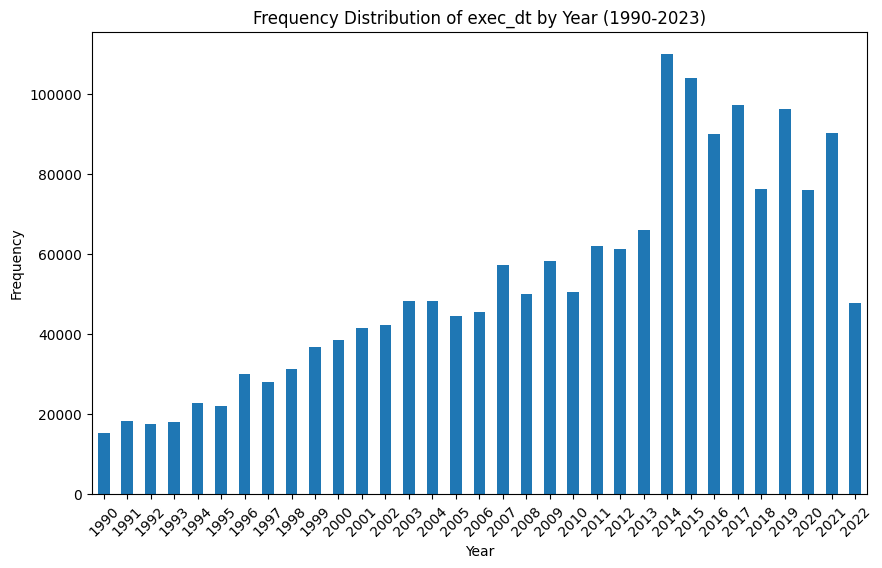

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 确保'exec_dt'列是datetime类型
filtered_merged_df['exec_dt'] = pd.to_datetime(filtered_merged_df['exec_dt'])

# 提取年份并计算频次分布
year_frequency = filtered_merged_df['exec_dt'].dt.year.value_counts().sort_index()

# 筛选1990年至2023年的数据
year_frequency = year_frequency[(year_frequency.index >= 1990) & (year_frequency.index <= 2022)]

# 绘制频次分布直方图
plt.figure(figsize=(10, 6))
year_frequency.plot(kind='bar')
plt.title('Frequency Distribution of exec_dt by Year (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Frequency')

# 设置横坐标标签显示步长，例如每5年显示一次
plt.xticks(ticks=np.arange(len(year_frequency)), labels=year_frequency.index, rotation=45)

plt.show()


In [ ]:
filtered_merged_df['or_name']

0                          LADT CARROLL H.
1                              JENSEN LEIF
2                              JENSEN LEIF
3                     PIZZICONI VINCENT B.
4           HOFMANN-CERFONTAINE HELLMUT W.
                         ...              
12138410            VOMMCHEMIPHARMA S.R.L.
12138411            VOMMCHEMIPHARMA S.R.L.
12138491        CEDECO CONTRACTORS LIMITED
12138492                  NICKELSON, DAN L
12138493                  NICKELSON, DAN L
Name: or_name, Length: 1740786, dtype: object

In [ ]:
import pandas as pd

# 计算exec_dt列中缺失值的个数
missing_values_count = filtered_merged_df['exec_dt'].isna().sum()

# 打印缺失值个数
print("Number of missing values in 'exec_dt' column:", missing_values_count)


Number of missing values in 'exec_dt' column: 0


In [ ]:
# 为merged_df增加一个索引列
filtered_merged_df['index'] = range(len(filtered_merged_df))
print(len(filtered_merged_df))
# 如果需要，保存拼接后的表到新的CSV文件
filtered_merged_df.to_csv('/content/drive/MyDrive/reassignment/reassignment_grant.csv', index=False)

<ipython-input-17-ef62526feabe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_df['index'] = range(len(filtered_merged_df))


1740786


transaction_grant.csv中包含的是：

1. 根据employer_assign字段剔除了first-assignment

2. convey_type为「assignment」的real Patent transaction

3. exec_date晚于等于grant_date;

4. exec_year位于[1990-2022]

5. 符合研究问题的有效rf_id

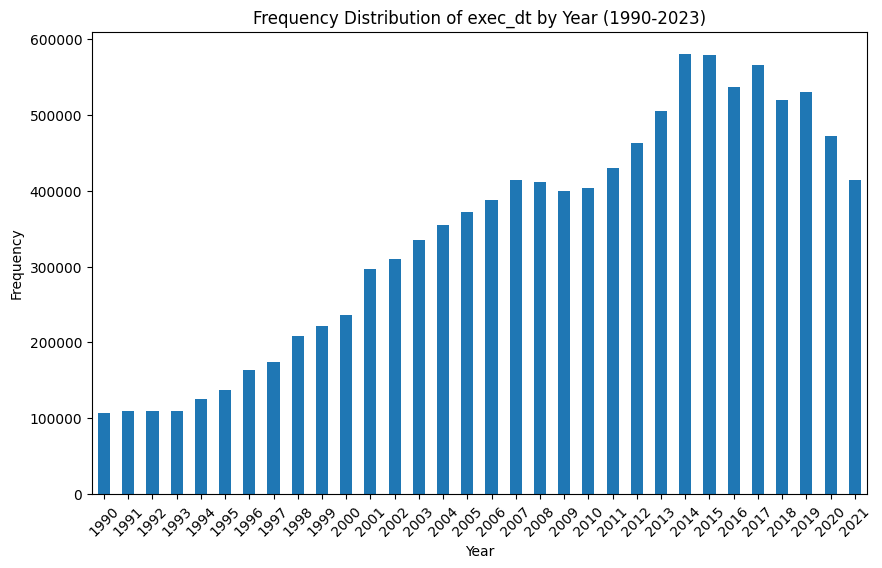

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 确保 exec_dt 是 datetime 类型
merged_df['exec_dt'] = pd.to_datetime(merged_df['exec_dt'], errors='coerce', format='%Y-%m-%d')

# 筛选条件：convey_ty 为 'assignment' 且 exec_dt 年份在 1998 到 2022 之间
filtered_df = merged_df[
    (merged_df['convey_ty'] == 'assignment') &
    (merged_df['exec_dt'].dt.year >= 1990) &
    (merged_df['exec_dt'].dt.year <= 2021)
]

# 提取年份并计算频次分布
year_frequency = filtered_df['exec_dt'].dt.year.value_counts().sort_index()

# 筛选1990年至2023年的数据
year_frequency = year_frequency[(year_frequency.index >= 1990) & (year_frequency.index <= 2021)]

# 绘制频次分布直方图
plt.figure(figsize=(10, 6))
year_frequency.plot(kind='bar')
plt.title('Frequency Distribution of exec_dt by Year (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Frequency')

# 设置横坐标标签显示步长，例如每5年显示一次
plt.xticks(ticks=np.arange(len(year_frequency)), labels=year_frequency.index, rotation=45)

plt.show()


存储无效的rf_id列表

In [18]:
import pandas as pd
import pickle

# 假设 documentid_df 是已经加载的 DataFrame 并包含列 employer_assign 和 rf_id

# 筛选出 employer_assign 为 1 的样本
filtered_df = assignment_conveyance_df[assignment_conveyance_df['employer_assign'] == 1]

# 将筛选出的样本中的 rf_id 值存储为一个列表
firstassign_rfid1 = filtered_df['rf_id'].tolist()

# 将列表保存到一个 pickle 文件中
with open('/content/drive/MyDrive/addition_list/firstassign_rfid1.pkl', 'wb') as file:
    pickle.dump(firstassign_rfid1, file)

print("列表已保存到文件。")


列表已保存到文件。
